In [182]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata_df = pd.read_csv(city_data_to_load)
ridedata_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(citydata_df,ridedata_df,how='outer',on='city')

# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [183]:
#set groupby
citygroup = combined_df.groupby('city')

#avg fare
avgfare = citygroup.mean()['fare']

#ride count
ridecount = citygroup['ride_id'].count()

#driver count 
drivercount = citygroup.max()['driver_count']

#city type
#set index
citytype = citydata_df.set_index('city')['type']

#create summary dataframe:
city_summary_df = pd.DataFrame({
    "Number of Rides": ridecount,
    "Average Fare": avgfare,
    "Driver Count": drivercount,
    "City Type": citytype
})


#separated df for each city type
urban = city_summary_df[city_summary_df['City Type']=="Urban"]
suburban = city_summary_df[city_summary_df['City Type']=="Suburban"]
rural = city_summary_df[city_summary_df['City Type']=="Rural"]

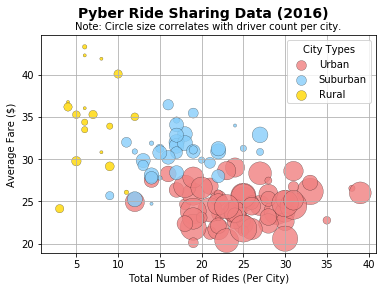

In [184]:
#Bubble Plot

# Obtain the x and y coordinates for each of the three city types

#urban ride count and fare rate
urbanridecount = urban["Number of Rides"]
urbanfares = urban["Average Fare"]
#urban driver count for circle size
urbandrivercount = urban["Driver Count"]

#suburban ride count and fare rate
suburbanridecount = suburban["Number of Rides"]
suburbanfares = suburban["Average Fare"]
#suburban driver count for circle size
suburbandrivercount = suburban["Driver Count"]

#rural ride count and fare rate
ruralridecount = rural["Number of Rides"]
ruralfares = rural["Average Fare"]
#rural driver count for circle size
ruraldrivercount = rural["Driver Count"]

#define colors
colorset = {'Light Coral':'#F08080','Light Sky Blue':'#87CEFA','Gold':'#FFD700'}
#sb.palplot(sb.color_palette(colors.values()))

#Color Dictionary 
colors = {'Urban': colorset['Light Coral'], 'Suburban': colorset['Light Sky Blue'], 'Rural': colorset['Gold']}


# Build the scatter plots for each city types
plt.scatter(urbanridecount, urbanfares, s=urbandrivercount*10, color=colors['Urban'],
            edgecolor='black', label='Urban',alpha=.8, linewidths=.25)
plt.scatter(suburbanridecount, suburbanfares, s=suburbandrivercount*10, color=colors['Suburban'],
            edgecolor='black', label='Suburban',alpha=.8,linewidths=.25)
plt.scatter(ruralridecount, ruralfares, s=ruraldrivercount*10, color=colors['Rural'],
            edgecolor='black', label='Rural',alpha=.8,linewidths=.25)

# Incorporate the other graph properties
plt.suptitle("Pyber Ride Sharing Data (2016)", fontsize=14, fontweight='bold')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Create a legend
lgnd = plt.legend(title='City Types')
lgnd.legendHandles[0]._sizes = [99]
lgnd.legendHandles[1]._sizes = [99]
lgnd.legendHandles[2]._sizes = [99]

# Incorporate a text label regarding circle size
plt.title("Note: Circle size correlates with driver count per city.", fontsize=10)

# Save Figure
plt.savefig('images/01pyberridesharingdata.jpg')

In [185]:
# Show plot
plt.show()

In [186]:
# split combined df into separate city types
urbandata = combined_df[combined_df['type']=="Urban"]
suburbandata = combined_df[combined_df['type']=="Suburban"]
ruraldata = combined_df[combined_df['type']=="Rural"]

#setcolors
colors1 = ["lightcoral","gold","lightskyblue"]
colors2 = ["gold","lightskyblue","lightcoral"]

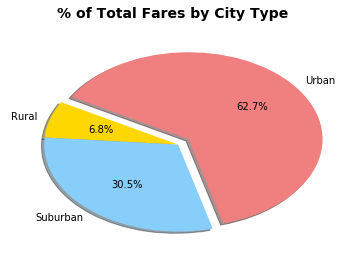

In [187]:
# % Total Fares by City Type Pie Chart

# find total fares collected
totalfares = combined_df.sum()['fare']

# find urban fare sum
urbantotalfare = urbandata['fare'].sum()
# find surburban fare sum
suburbantotalfare = suburbandata['fare'].sum()
# find rural fare sum
ruraltotalfare = ruraldata['fare'].sum()

labels = ["Urban","Rural","Suburban"]
farevalues = [urbantotalfare,ruraltotalfare,suburbantotalfare]

# Build Pie Chart
plt.pie(farevalues,explode=(0.1,0,0),colors=colors1,startangle=285,labels=labels,autopct="%1.1f%%",shadow=True)
plt.suptitle("% of Total Fares by City Type", fontsize=14, fontweight='bold')

# Save Figure
plt.savefig('images/02farebycitytypepie.jpg')

In [188]:
# Show Figure
plt.show()

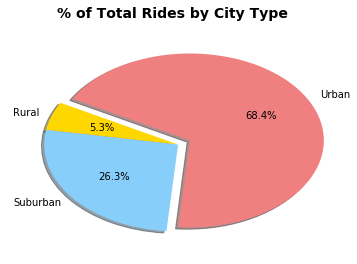

In [189]:
# % Total Rides by City Type Pie Chart

# find total ride count
totalrides = combined_df.count()['ride_id']

# find urban ride count
urbanridecount = urbandata['ride_id'].count()
# find surburban ride count
suburbanridecount = suburbandata['ride_id'].count()
# find rural ride count
ruralridecount = ruraldata['ride_id'].count()

labels = ["Urban","Rural","Suburban"]
ridevalues = [urbanridecount,ruralridecount,suburbanridecount]

# Build Pie Chart
plt.pie(ridevalues,explode=(0.1,0,0),colors=colors1,startangle=265,labels=labels,autopct="%1.1f%%",shadow=True)
plt.suptitle("% of Total Rides by City Type", fontsize=14, fontweight='bold')

# Save Figure
plt.savefig('images/03ridesbycitytypepie.jpg')

In [190]:
# Show Figure
plt.show()

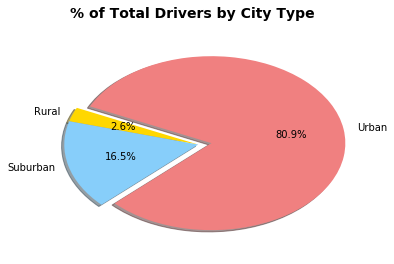

In [191]:
# % Total Drivers by City Type Pie Chart

# find total driver count
totaldrivers = citydata_df.groupby('type').sum()['driver_count']

labels = ["Rural","Suburban","Urban"]

# Build Pie Chart
plt.pie(totaldrivers,explode=(0,0,0.1),startangle=155,labels=labels,colors=colors2,autopct="%1.1f%%",shadow=True)
plt.suptitle("% of Total Drivers by City Type", fontsize=14, fontweight='bold')

# Save Figure
plt.savefig('images/04driversbycitytypepie.jpg')

In [192]:
# Show Figure
plt.show()